In [1]:
@time using Clp
@time using JuMP
@time using Plots

 19.860636 seconds (928.53 k allocations: 64.529 MiB, 0.91% gc time, 0.20% compilation time)
  1.493078 seconds (167.89 k allocations: 10.262 MiB, 11.97% gc time)
 43.696154 seconds (996.25 k allocations: 69.527 MiB, 0.33% gc time, 1.73% compilation time: 92% of which was recompilation)


## Problema 2: (Tipos de PL)

Determine o tipo (inviável, solução ilimitada, solução ótima limitada) dos seguintes PL. Mostre sua resolução de cada caso graficamente.
$$
\begin{array}{rcl}
\text{maximize}   & x_1 + x_2  &   \\
\text{sujeito a}  & 2x_1 + x_2 & \leq 1 \\
                  & x_1 + x_2  & \geq 2 \\
                  & x_1,x_2    & \geq 0
\end{array}
$$

--------------------------------------------

$$
\begin{array}{rcl}
\text{maximize}   & 3x_1 + x_2  &   \\
\text{sujeito a}  & 2x_1 + x_2 & \geq 1 \\
                  & x_1,x_2    & \geq 0
\end{array}
$$

--------------------------------------------

$$
\begin{array}{rcl}
\text{maximize}   & 12x_1 + 10x_2  &   \\
\text{sujeito a}  & x_1 + x_2 & \leq 20 \\
                  & 0.5x_1 + x_2   & \leq 12 \\
                  & \frac{1}{16}x_1 + \frac{1}{24}x_2   & \leq 1 \\
                  & 12x_1 - 8x_2  & \geq 0 \\
                  &  x_1,x_2  & \geq 0
\end{array}
$$


### Solução do Problema 2

In [2]:
m = Model(Clp.Optimizer)
@variable(m, x1 >= 0)
@variable(m, x2 >= 0)
@constraint(m, 2x1 + x2 <= 1)
@constraint(m, x1 + x2 >= 2)
@objective(m, Max, x1 + x2)

optimize!(m)

status = termination_status(m)
println("Status da Solução: ", status)


Status da Solução: INFEASIBLE
Coin0507I Presolve determined that the problem was infeasible with tolerance of 1e-08
Clp3003W Analysis indicates model infeasible or unbounded
Clp0006I 0  Obj 0 Primal inf 1.9999999 (1) Dual inf 1.9999998 (2)
Clp0006I 1  Obj 0 Primal inf 0.9999999 (1)
Clp0001I Primal infeasible - objective value 0
Clp0032I PrimalInfeasible objective 0 - 1 iterations time 0.002


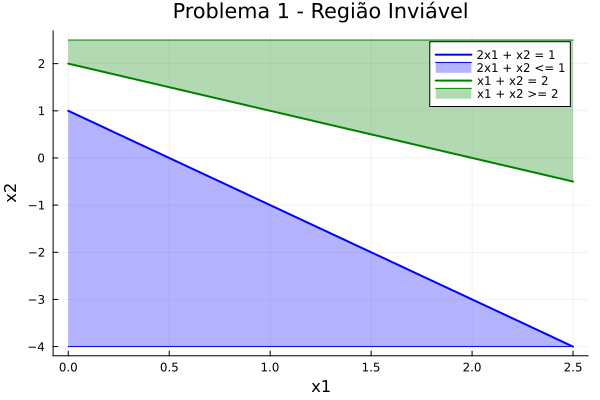

In [30]:
x1 = 0:0.1:2.5

x2_1 = 1 .- 2 .* x1

x2_upper = fill(2.5, length(x1))
x2_lower = fill(-4,   length(x1))

x2_2 = 2 .- x1

plot(x1, x2_1, label="2x1 + x2 = 1", color=:blue, linewidth=2)
plot!(x1, x2_lower, fillrange=x2_1, fillalpha=0.3, label="2x1 + x2 <= 1", color=:blue)
plot!(x1, x2_2, label="x1 + x2 = 2", color=:green, linewidth=2)
plot!(x1, x2_upper, fillrange=x2_2, fillalpha=0.3, label="x1 + x2 >= 2", color=:green)

xlabel!("x1")
ylabel!("x2")
title!("Problema 1 - Região Inviável")

plot!()


Com base nessa representação gráfica, notamos que esse primeiro problema é inviável, pois não há intersecção entre essas retas de forma que fique abaixo da reta azul e acima da reta verde

In [4]:
m = Model(Clp.Optimizer)
@variable(m, x1 >= 0)
@variable(m, x2 >= 0)
@constraint(m, 2x1 + x2 >= 1)
@objective(m, Max, 3x1 + x2)

optimize!(m)

status = termination_status(m)
println("Status da Solução: ", status)

Status da Solução: DUAL_INFEASIBLE
Coin0508I Presolve thinks problem is unbounded
Clp3003W Analysis indicates model infeasible or unbounded
Clp0006I 0  Obj 0 Primal inf 0.9999999 (1) Dual inf 3.9999998 (2)
Clp0002I Dual infeasible - objective value 4e+10
Clp0032I DualInfeasible objective 4e+10 - 0 iterations time 0.002


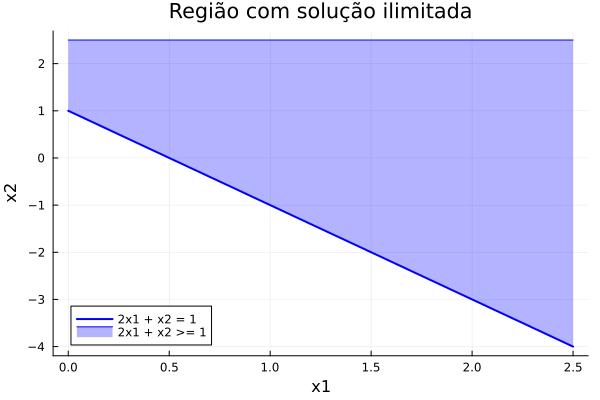

In [31]:
x1 = 0:0.1:2.5

x2_eq = 1 .- 2 .* x1

x2_upper = fill(2.5, length(x1))

plot(x1, x2_eq, label="2x1 + x2 = 1", color=:blue, linewidth=2)

plot!(x1, x2_upper, fillrange=x2_eq, fillalpha=0.3, label="2x1 + x2 >= 1", color=:blue)

xlabel!("x1")
ylabel!("x2")
title!("Região com solução ilimitada")

plot!()

Com essa representação percebemos que para esse problema não há solução exata pois para $2x_1 + x_2 \geq 1$ existem infinitas soluções.

In [5]:
m = Model(Clp.Optimizer)
@variable(m, x1 >= 0)
@variable(m, x2 >= 0)
@constraint(m, x1 + x2 <= 20)
@constraint(m, 0.5x1 + x2 <= 12)
@constraint(m, x1/16 + x2/24 <= 1)
@constraint(m, 12x1 - 8x2 >= 0)
@objective(m, Max, 12x1 + 10x2)

optimize!(m)

status = termination_status(m)
println("Status da Solução: ", status)

Status da Solução: OPTIMAL
Coin0506I Presolve 4 (0) rows, 2 (0) columns and 8 (0) elements
Clp0006I 0  Obj 0 Dual inf 22 (2)
Clp0006I 3  Obj 204
Clp0000I Optimal - objective value 204
Clp0032I Optimal objective 204 - 3 iterations time 0.002


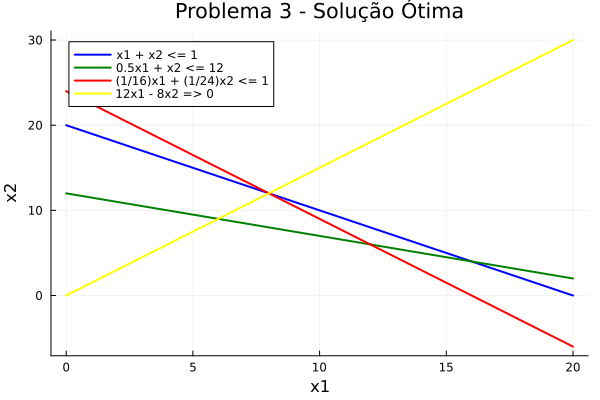

In [41]:
x1 = 0:0.1:20

x2_1 = 20 .- x1

#x2_upper = fill(2.5, length(x1))
#x2_lower = fill(-4,   length(x1))

x2_2 = 12 .- 0.5 .* x1
x2_3 = 24*(1 .- (1/16) .* x1)
x2_4 = (12/8) .* x1

plot(x1, x2_1, label="x1 + x2 <= 1", color=:blue, linewidth=2)
#plot!(x1, x2_lower, fillrange=x2_1, fillalpha=0.3, label="2x1 + x2 <= 1", color=:blue)
plot!(x1, x2_2, label="0.5x1 + x2 <= 12", color=:green, linewidth=2)
#plot!(x1, x2_upper, fillrange=x2_2, fillalpha=0.3, label="x1 + x2 >= 2", color=:green)
plot!(x1, x2_3, label="(1/16)x1 + (1/24)x2 <= 1", color=:red, linewidth=2)

plot!(x1, x2_4, label="12x1 - 8x2 => 0", color=:yellow, linewidth=2)

xlabel!("x1")
ylabel!("x2")
title!("Problema 3 - Solução Ótima")

plot!()